In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [748]:
employment_df = pd.read_csv('data/CNA27.20231016T221051.csv')
income_df = pd.read_csv('data/NEA08.20231106T211151.csv')
population_df= pd.read_csv('data/FY001.20231016T201055.csv')


#Fill all Nan with np.nan for consistency
employment_df.fillna(np.nan)
income_df.fillna(np.nan)
population_df.fillna(np.nan)

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
0,Population at Each Census,1841,State,Both sexes,Number,6528799
1,Population at Each Census,1841,State,Male,Number,3222485
2,Population at Each Census,1841,State,Female,Number,3306314
3,Population at Each Census,1841,Carlow,Both sexes,Number,86228
4,Population at Each Census,1841,Carlow,Male,Number,42428
...,...,...,...,...,...,...
2101,Population at Each Census,2022,Donegal,Male,Number,82795
2102,Population at Each Census,2022,Donegal,Female,Number,84289
2103,Population at Each Census,2022,Monaghan,Both sexes,Number,65288
2104,Population at Each Census,2022,Monaghan,Male,Number,32894


Check and explore the employment data

In [749]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          2880 non-null   object 
 1   Sex                      2880 non-null   object 
 2   Industry                 2880 non-null   object 
 3   Province County or City  2880 non-null   object 
 4   CensusYear               2880 non-null   int64  
 5   UNIT                     2880 non-null   object 
 6   VALUE                    2784 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 157.6+ KB


In [750]:
employment_df.describe()

,CensusYear,VALUE
count,2880.000000,2.784000e+03
mean,2008.750000,1.879636e+04
std,5.262805,8.961664e+04
min,2002.000000,5.000000e+00
25%,2005.000000,1.412750e+03
50%,2008.500000,3.415500e+03
75%,2012.250000,8.693500e+03
max,2016.000000,2.006641e+06


In [751]:
employment_df.head()

,Statistic Label,Sex,Industry,Province County or City,CensusYear,UNIT,VALUE
0,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2002,Number,97281.0
1,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2006,Number,89277.0
2,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2011,Number,94247.0
3,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2016,Number,89116.0
4,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Leinster,2002,Number,31795.0


In [752]:
employment_df.tail()

,Statistic Label,Sex,Industry,Province County or City,CensusYear,UNIT,VALUE
2875,Population 15 years and over at work,Both sexes,All industries,Donegal,2016,Number,58353.0
2876,Population 15 years and over at work,Both sexes,All industries,Monaghan,2002,Number,21101.0
2877,Population 15 years and over at work,Both sexes,All industries,Monaghan,2006,Number,25378.0
2878,Population 15 years and over at work,Both sexes,All industries,Monaghan,2011,Number,23005.0
2879,Population 15 years and over at work,Both sexes,All industries,Monaghan,2016,Number,25549.0


In [753]:
employment_df.dtypes

Statistic Label             object
Sex                         object
Industry                    object
Province County or City     object
CensusYear                   int64
UNIT                        object
VALUE                      float64
dtype: object

In [754]:
# UNIT just says want kinda variable it is. Not needed
employment_df = employment_df.drop(['UNIT'], axis=1)
employment_df = employment_df.rename(columns={'Province County or City':'County'})

In [755]:
employment_df.count()

Statistic Label    2880
Sex                2880
Industry           2880
County             2880
CensusYear         2880
VALUE              2784
dtype: int64

In [756]:
print(employment_df.isnull().sum()) 

Statistic Label     0
Sex                 0
Industry            0
County              0
CensusYear          0
VALUE              96
dtype: int64


In [757]:
employment_df[employment_df['County'] == 'Tipperary']

,Statistic Label,Sex,Industry,County,CensusYear,VALUE
108,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2002,7020.0
109,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2006,6784.0
110,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2011,6817.0
111,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2016,6740.0
288,Population 15 years and over at work,Both sexes,"Mining, quarrying and turf production",Tipperary,2002,575.0
...,...,...,...,...,...,...
2631,Population 15 years and over at work,Both sexes,Industry not stated,Tipperary,2016,4753.0
2808,Population 15 years and over at work,Both sexes,All industries,Tipperary,2002,56325.0
2809,Population 15 years and over at work,Both sexes,All industries,Tipperary,2006,65183.0
2810,Population 15 years and over at work,Both sexes,All industries,Tipperary,2011,60332.0


In [758]:
#Seems that the various missing values are are those that were merged/ deprecated
null_df = employment_df[employment_df['VALUE'].isnull()]
null_df['County'].unique()

array(['Limerick City', 'Limerick County', 'North Tipperary',
       'South Tipperary', 'Waterford City', 'Waterford County'],
      dtype=object)

#Income Data   

In [759]:
income_df.describe()

,Year,VALUE
count,1944.000000,1944.000000
mean,2016.500000,37090.222222
std,3.452941,6510.201505
min,2011.000000,25520.000000
25%,2013.750000,32379.000000
50%,2016.500000,36203.000000
75%,2019.250000,40676.750000
max,2022.000000,68913.000000


In [760]:
income_df['County'].unique()

array(['All counties (1)', 'Carlow', 'Dublin', 'Kildare', 'Kilkenny',
       'Laois', 'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath',
       'Wexford', 'Wicklow', 'Clare', 'Cork', 'Kerry', 'Limerick',
       'Tipperary', 'Waterford', 'Galway', 'Leitrim', 'Mayo', 'Roscommon',
       'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

In [761]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  1944 non-null   object
 1   Year             1944 non-null   int64 
 2   County           1944 non-null   object
 3   Sex              1944 non-null   object
 4   UNIT             1944 non-null   object
 5   VALUE            1944 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 91.3+ KB


In [762]:
income_df.dtypes

Statistic Label    object
Year                int64
County             object
Sex                object
UNIT               object
VALUE               int64
dtype: object

In [763]:
income_df.head()

,Statistic Label,Year,County,Sex,UNIT,VALUE
0,Mean Annual Earnings,2011,All counties (1),Both sexes,Euro,39594
1,Mean Annual Earnings,2011,All counties (1),Male,Euro,45781
2,Mean Annual Earnings,2011,All counties (1),Female,Euro,33733
3,Mean Annual Earnings,2011,Carlow,Both sexes,Euro,34815
4,Mean Annual Earnings,2011,Carlow,Male,Euro,38715


In [764]:
income_df.tail()

,Statistic Label,Year,County,Sex,UNIT,VALUE
1939,Median Annual Earnings,2022,Donegal,Male,Euro,34688
1940,Median Annual Earnings,2022,Donegal,Female,Euro,32059
1941,Median Annual Earnings,2022,Monaghan,Both sexes,Euro,34707
1942,Median Annual Earnings,2022,Monaghan,Male,Euro,36401
1943,Median Annual Earnings,2022,Monaghan,Female,Euro,32083


In [765]:
income_df.iloc[:, 0]


0         Mean Annual Earnings
1         Mean Annual Earnings
2         Mean Annual Earnings
3         Mean Annual Earnings
4         Mean Annual Earnings
                 ...          
1939    Median Annual Earnings
1940    Median Annual Earnings
1941    Median Annual Earnings
1942    Median Annual Earnings
1943    Median Annual Earnings
Name: Statistic Label, Length: 1944, dtype: object

Population

In [766]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  2106 non-null   object
 1   CensusYear       2106 non-null   int64 
 2   County           2106 non-null   object
 3   Sex              2106 non-null   object
 4   UNIT             2106 non-null   object
 5   VALUE            2106 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 98.8+ KB


In [767]:
population_df.describe()

,CensusYear,VALUE
count,2106.000000,2.106000e+03
mean,1946.576923,1.849786e+05
std,53.843841,5.140124e+05
min,1841.000000,1.201300e+04
25%,1901.000000,3.661700e+04
50%,1958.500000,6.349050e+04
75%,1991.000000,1.118672e+05
max,2022.000000,6.528799e+06


In [768]:
population_df.head()

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
0,Population at Each Census,1841,State,Both sexes,Number,6528799
1,Population at Each Census,1841,State,Male,Number,3222485
2,Population at Each Census,1841,State,Female,Number,3306314
3,Population at Each Census,1841,Carlow,Both sexes,Number,86228
4,Population at Each Census,1841,Carlow,Male,Number,42428


In [769]:
population_df.tail()

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
2101,Population at Each Census,2022,Donegal,Male,Number,82795
2102,Population at Each Census,2022,Donegal,Female,Number,84289
2103,Population at Each Census,2022,Monaghan,Both sexes,Number,65288
2104,Population at Each Census,2022,Monaghan,Male,Number,32894
2105,Population at Each Census,2022,Monaghan,Female,Number,32394


Joining all the tables on the basis of County and CensusYear

In [770]:
population_df = population_df[population_df['CensusYear'] >=2011]
population_df = population_df[population_df['Sex'] == 'Both sexes']
population_df = population_df[['CensusYear', 'County', 'VALUE']].rename(columns={'VALUE':'Population'})
population_df


,CensusYear,County,Population
1863,2011,State,4588252
1866,2011,Carlow,54612
1869,2011,Dublin,1273069
1872,2011,Kildare,210312
1875,2011,Kilkenny,95419
...,...,...,...
2091,2022,Roscommon,70259
2094,2022,Sligo,70198
2097,2022,Cavan,81704
2100,2022,Donegal,167084


In [771]:
income_df = income_df[income_df['Sex']=='Both sexes']
income_df = income_df[income_df['Statistic Label']== 'Mean Annual Earnings']
income_df = income_df[['Year', 'County', 'VALUE']].rename(columns={'Year':'CensusYear', 'VALUE':'MeanIncome'})
income_df

,CensusYear,County,MeanIncome
0,2011,All counties (1),39594
3,2011,Carlow,34815
6,2011,Dublin,44243
9,2011,Kildare,42084
12,2011,Kilkenny,36856
...,...,...,...
957,2022,Roscommon,44833
960,2022,Sligo,45599
963,2022,Cavan,43183
966,2022,Donegal,39156


In [772]:
employment_df = employment_df[employment_df['CensusYear'] >= 2011].rename(columns={'VALUE':'WorkingPopulation'})
employment_df = employment_df[['CensusYear', 'Industry', 'County', 'WorkingPopulation']]
employment_df

,CensusYear,Industry,County,WorkingPopulation
2,2011,"Agriculture, forestry and fishing",State,94247.0
3,2016,"Agriculture, forestry and fishing",State,89116.0
6,2011,"Agriculture, forestry and fishing",Leinster,30594.0
7,2016,"Agriculture, forestry and fishing",Leinster,29507.0
10,2011,"Agriculture, forestry and fishing",Carlow,1397.0
...,...,...,...,...
2871,2016,All industries,Cavan,30509.0
2874,2011,All industries,Donegal,53277.0
2875,2016,All industries,Donegal,58353.0
2878,2011,All industries,Monaghan,23005.0


In [773]:
joint_df = employment_df.merge(right=population_df,
                               on=['CensusYear', 'County'],
                               how='left')

joint_df = joint_df.merge(right=income_df,
                          on=['CensusYear', 'County'],
                          how='left')
joint_df.dropna(inplace=True)
joint_df['pctIndustryEmployement'] = joint_df['WorkingPopulation']/joint_df['Population'] * 100
joint_df.to_csv('data/joined_data.csv', index=False)

In [774]:
joint_df['CensusYear'].unique()

array([2011, 2016], dtype=int64)

#Visual representation of the relationships between the various variables 

Text(0, 0.5, 'MeanIncome')

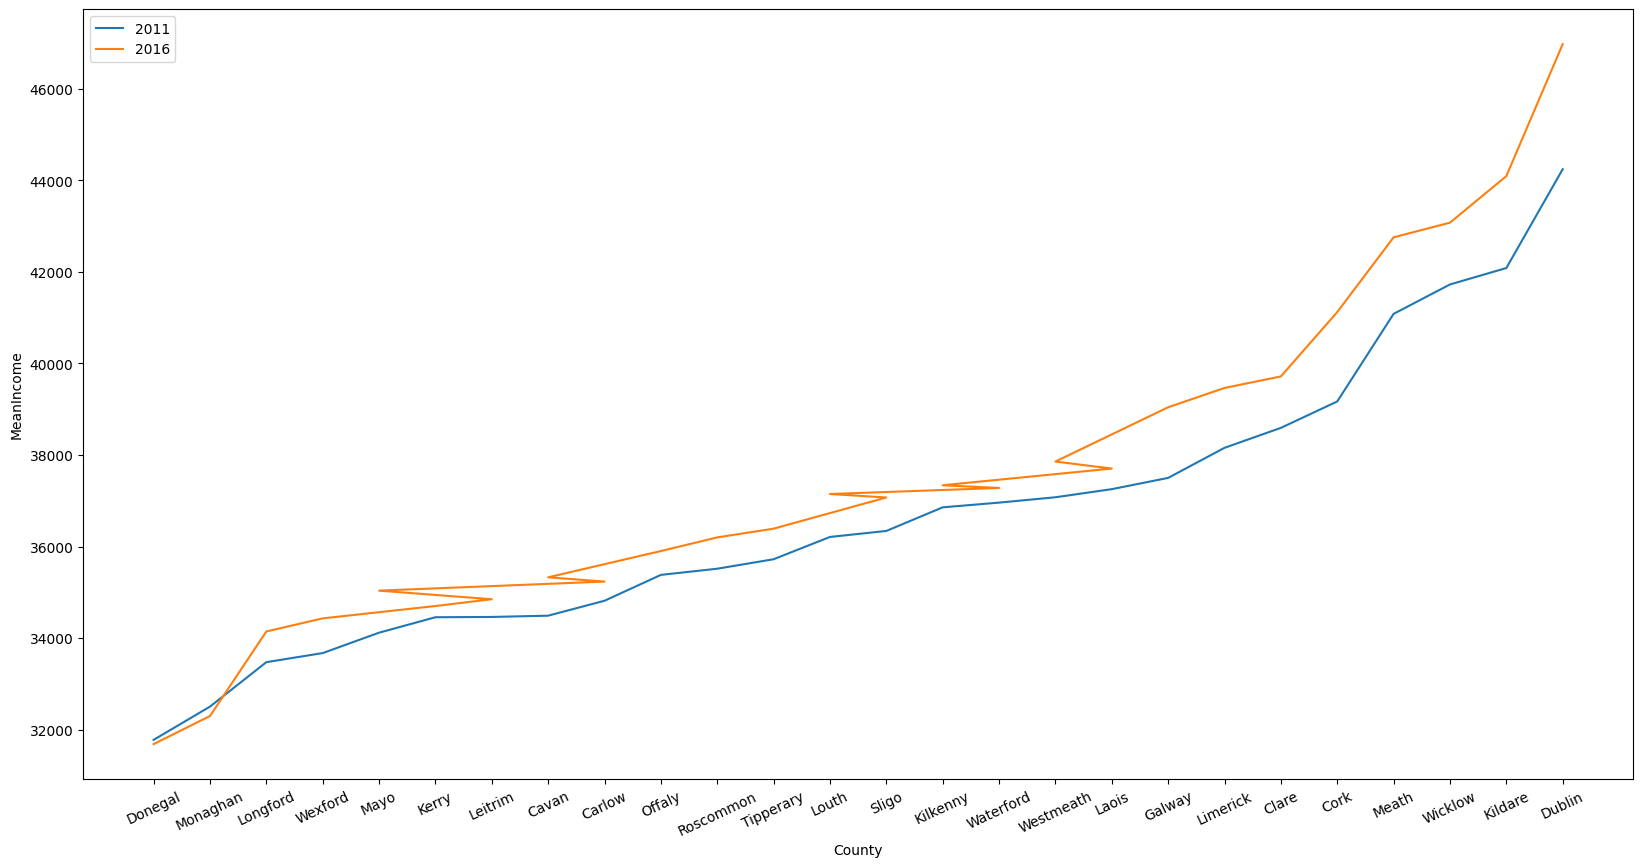

In [775]:
fig, ax = plt.subplots(figsize=(20, 10))

county_income = joint_df[['County', 'MeanIncome', 'CensusYear']]



county_income_2011 = county_income[county_income['CensusYear']==2011].sort_values(by='MeanIncome').drop_duplicates()
county_income_2016 = county_income[county_income['CensusYear']==2016].sort_values(by='MeanIncome').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(county_income_2011['County'], county_income_2011['MeanIncome'], label='2011')
ax.plot(county_income_2016['County'], county_income_2016['MeanIncome'], label='2016')
ax.legend()
plt.xlabel('County')
plt.ylabel('MeanIncome')


Text(0, 0.5, 'pctIndustryEmployement')

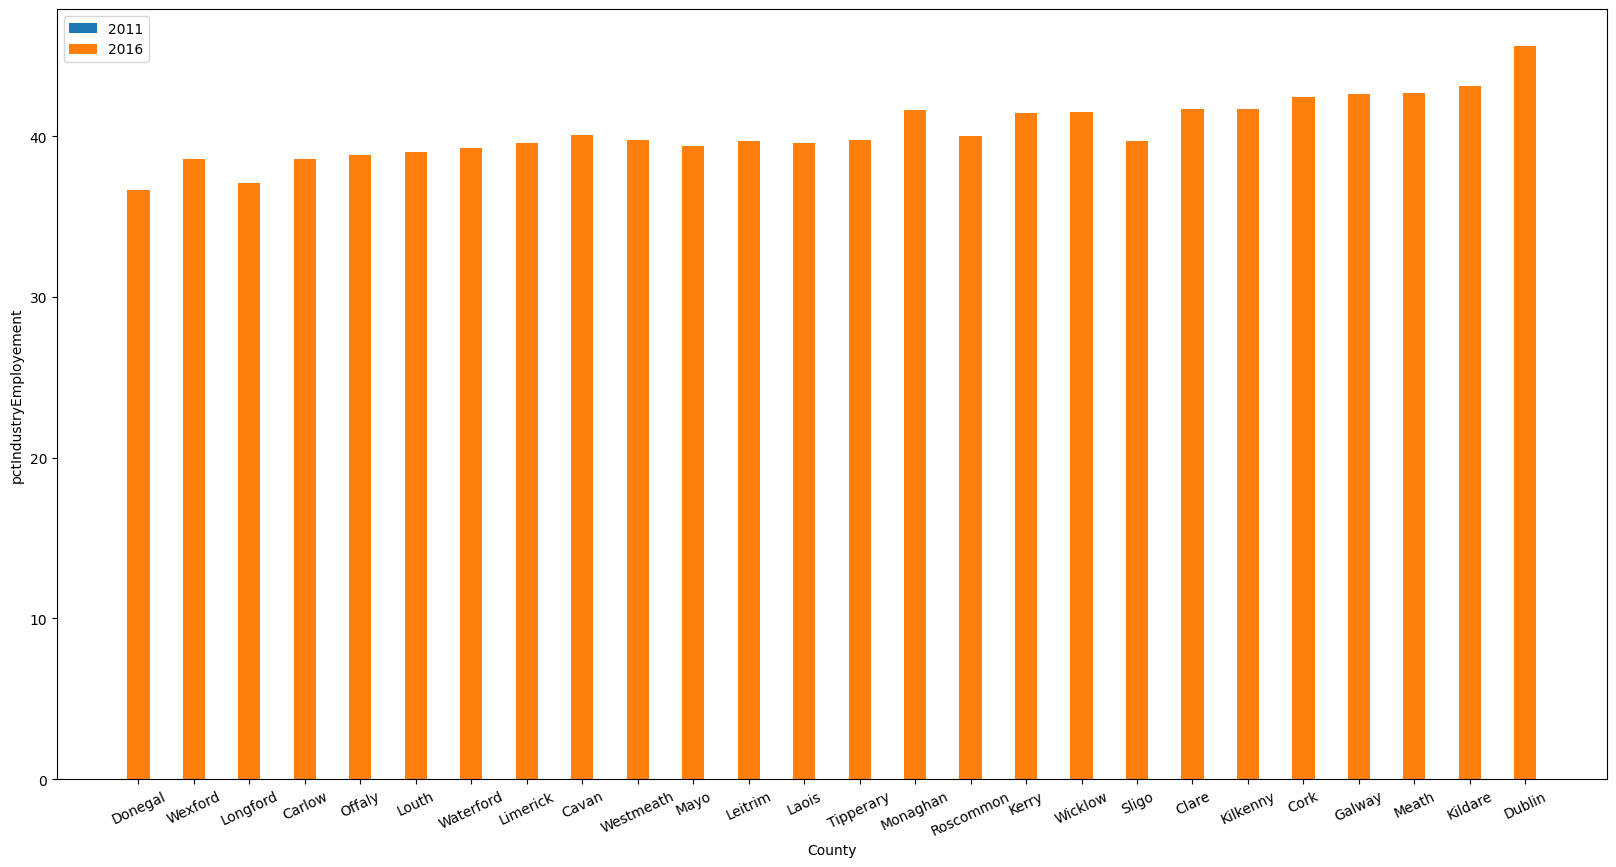

In [776]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working = joint_df[['County', 'pctIndustryEmployement', 'CensusYear', 'Industry']]
pct_working = pct_working[pct_working['Industry']=='All industries']


pct_working_2011 = pct_working[pct_working['CensusYear']==2011].sort_values(by='pctIndustryEmployement').drop_duplicates()
pct_working_2016 = pct_working[pct_working['CensusYear']==2016].sort_values(by='pctIndustryEmployement').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.bar(pct_working_2011['County'], pct_working_2011['pctIndustryEmployement'], 0.4, label='2011')
ax.bar(pct_working_2016['County'], pct_working_2016['pctIndustryEmployement'], 0.4, label='2016')
ax.legend()
plt.xlabel("County")
plt.ylabel("pctIndustryEmployement")


Text(0, 0.5, 'MeanIncome')

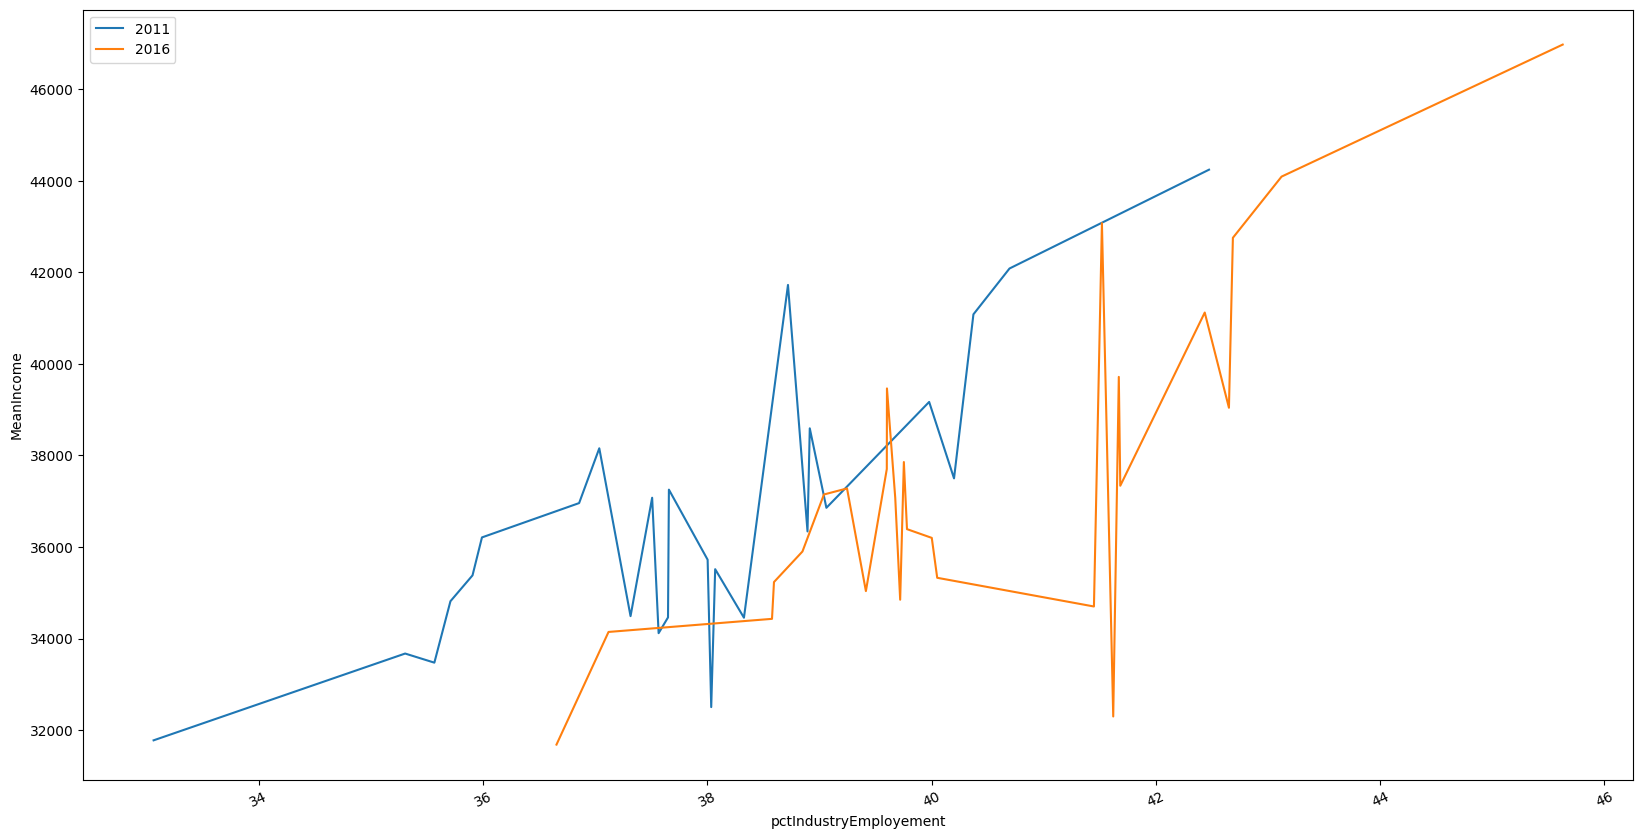

In [777]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working_income = joint_df[['County', 'pctIndustryEmployement', 'CensusYear', 'Industry', 'MeanIncome']]
pct_working_income = pct_working_income[pct_working_income['Industry']=='All industries']


pct_working_income_2011 = pct_working_income[pct_working_income['CensusYear']==2011].sort_values(by='pctIndustryEmployement').drop_duplicates()
pct_working_income_2016 = pct_working_income[pct_working_income['CensusYear']==2016].sort_values(by='pctIndustryEmployement').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(pct_working_income_2011['pctIndustryEmployement'], pct_working_income_2011['MeanIncome'], label='2011')
ax.plot(pct_working_income_2016['pctIndustryEmployement'], pct_working_income_2016['MeanIncome'], label='2016')
ax.legend()
plt.xlabel("pctIndustryEmployement")
plt.ylabel("MeanIncome")


Text(0, 0.5, 'Population')

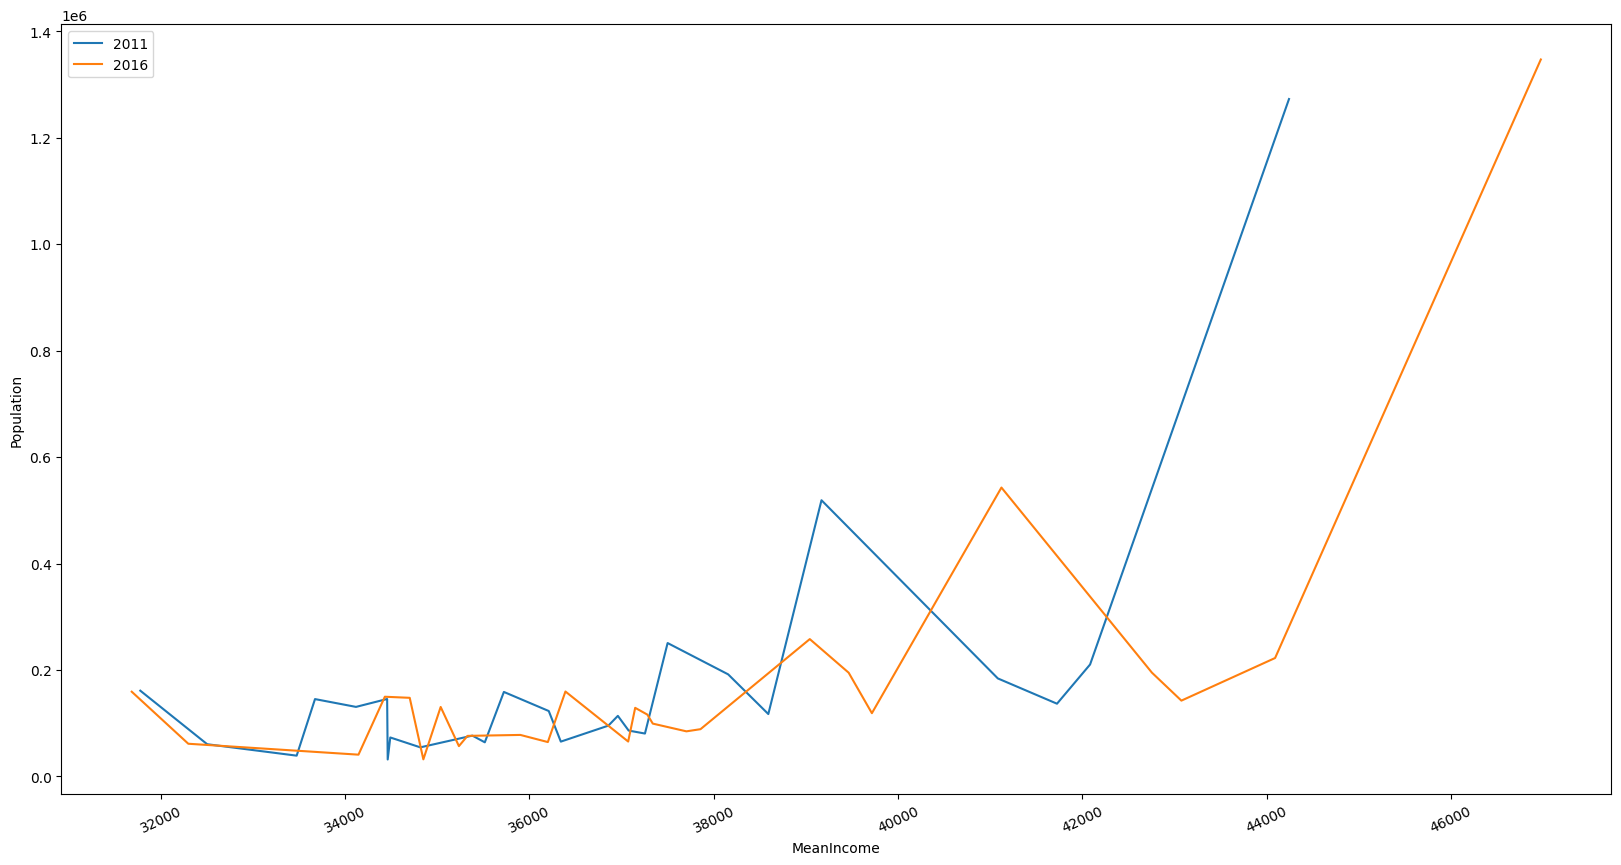

In [778]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working_income = joint_df[['County', 'pctIndustryEmployement', 'CensusYear', 'Industry', 'MeanIncome', 'Population']]
pct_working_income = pct_working_income[pct_working_income['Industry']=='All industries']


pct_working_income_2011 = pct_working_income[pct_working_income['CensusYear']==2011].sort_values(by='MeanIncome').drop_duplicates()
pct_working_income_2016 = pct_working_income[pct_working_income['CensusYear']==2016].sort_values(by='MeanIncome').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(pct_working_income_2011['MeanIncome'], pct_working_income_2011['Population'], label='2011')
ax.plot(pct_working_income_2016['MeanIncome'], pct_working_income_2016['Population'], label='2016')
ax.legend()
plt.xlabel("MeanIncome")
plt.ylabel("Population")
